In [2]:
# Import required libraries
import pandas as pd
import requests
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization styles
sns.set_theme(style="whitegrid")


QUIZ DATA

In [3]:
import pandas as pd
import requests
import json

# Fetch data from API endpoints
def fetch_data(endpoint):
    try:
        response = requests.get(endpoint)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {endpoint}: {e}")
        return None

# API Endpoints (replace with actual URLs)
QUIZ_ENDPOINT = "https://www.jsonkeeper.com/b/LLQT"  # Quiz Metadata

# Fetch data from endpoints
quiz_data_raw = fetch_data(QUIZ_ENDPOINT)

# Parse quiz data
def parse_quiz_data(data):
    quizzes = []
    questions_list = []
    options_list = []
    
    # Access the quiz data directly
    quiz = data["quiz"]
    quiz_id = quiz["id"]
    quizzes.append({
        "quiz_id": quiz_id,
        "title": quiz["title"],
        "topic": quiz["topic"],
        "difficulty_level": quiz.get("difficulty_level", "Unknown"),
        "correct_answer_marks": float(quiz.get("correct_answer_marks", 4.0)),
        "negative_marks": float(quiz.get("negative_marks", 1.0)),
        "total_questions": quiz["questions_count"],
    })
    
    for question in quiz.get("questions", []):
        question_id = question["id"]
        questions_list.append({
            "quiz_id": quiz_id,
            "question_id": question_id,
            "description": question["description"],
            "difficulty_level": question.get("difficulty_level", "Unknown"),
            "topic": question["topic"],
            "is_published": question["is_published"]
            # Add more fields as needed
        })
        
        for option in question.get("options", []):
            options_list.append({
                "question_id": question_id,
                "option_id": option["id"],
                "description": option["description"],
                "is_correct": option["is_correct"]
                # Add more fields as needed
            })
    
    quizzes_df = pd.DataFrame(quizzes)
    questions_df = pd.DataFrame(questions_list)
    options_df = pd.DataFrame(options_list)
    
    return quizzes_df, questions_df, options_df

# Parse the quiz data
quizzes_df, questions_df, options_df = parse_quiz_data(quiz_data_raw)

# Display the structured data
print("Quizzes Data:")
print(quizzes_df.head())

Quizzes Data:
   quiz_id                                              title  \
0       43  Structural Organisation in Animals and Plants (7)   

                                topic difficulty_level  correct_answer_marks  \
0  Structural Organisation in Animals             None                   4.0   

   negative_marks  total_questions  
0             1.0              128  


In [4]:
print("\nQuestions Data:")
print(questions_df.head())


Questions Data:
   quiz_id  question_id                                        description  \
0       43         1827  The tissue which has free surface that faces e...   
1       43         1828  Epithelial tissue is distinguished from connec...   
2       43         1829  The ciliated columnar epithelial cells in huma...   
3       43         1830                The squamous epithelium is found in   
4       43         1831  The kind of epithelium which forms the inner w...   

  difficulty_level                                topic  is_published  
0             None  structural organisation in animals           True  
1             None  structural organisation in animals           True  
2             None  structural organisation in animals           True  
3             None  structural organisation in animals           True  
4             None  structural organisation in animals           True  


In [5]:
print("\nOptions Data:")
print(options_df.head())


Options Data:
   question_id  option_id                 description  is_correct
0         1827       7321             Muscular tissue       False
1         1827       7322     Fluid connective tissue       False
2         1827       7323           Epithelial tissue        True
3         1827       7324              Nervous tissue       False
4         1828       7325  large extracellular matrix       False


In [6]:
import pandas as pd
import requests
import json

# Fetch data from API endpoint
def fetch_data(endpoint):
    try:
        response = requests.get(endpoint)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {endpoint}: {e}")
        return None

# API Endpoint for quiz submission
QUIZ_SUBMISSION_ENDPOINT = "https://api.jsonserve.com/rJvd7g"

# Fetch data from endpoint
quiz_submission_data_raw = fetch_data(QUIZ_SUBMISSION_ENDPOINT)

# Parse quiz submission data
def parse_quiz_submission_data(data):
    # Extract main submission details
    submission_details = {
        "submission_id": data["id"],
        "quiz_id": data["quiz_id"],
        "user_id": data["user_id"],
        "submitted_at": data["submitted_at"],
        "score": data["score"],
        "trophy_level": data["trophy_level"],
        "accuracy": float(data["accuracy"].strip(" %")),
        "speed": int(data["speed"]),
        "final_score": float(data["final_score"]),
        "negative_score": float(data["negative_score"]),
        "correct_answers": data["correct_answers"],
        "incorrect_answers": data["incorrect_answers"],
        "source": data["source"],
        "type": data["type"],
        "started_at": data["started_at"],
        "ended_at": data["ended_at"],
        "duration": data["duration"],
        "better_than": data["better_than"],
        "total_questions": data["total_questions"],
        "rank_text": data["rank_text"],
        "mistakes_corrected": data["mistakes_corrected"],
        "initial_mistake_count": data["initial_mistake_count"]
    }
    
    # Extract response map
    response_map = [{"question_id": q_id, "option_id": o_id} for q_id, o_id in data["response_map"].items()]
    
    # Extract quiz details
    quiz_details = {
        "quiz_id": data["quiz"]["id"],
        "title": data["quiz"]["title"],
        "topic": data["quiz"]["topic"],
        "difficulty_level": data["quiz"].get("difficulty_level", "Unknown"),
        "questions_count": data["quiz"]["questions_count"],
        "correct_answer_marks": float(data["quiz"].get("correct_answer_marks", 4.0)),
        "negative_marks": float(data["quiz"].get("negative_marks", 1.0))
    }
    
    # Convert to DataFrames
    submission_df = pd.DataFrame([submission_details])
    response_map_df = pd.DataFrame(response_map)
    quiz_details_df = pd.DataFrame([quiz_details])
    
    return submission_df, response_map_df, quiz_details_df

# Parse the quiz submission data
submission_df, response_map_df, quiz_details_df = parse_quiz_submission_data(quiz_submission_data_raw)

# Display the structured data
print("Submission Details:")
print(submission_df.head())

Submission Details:
   submission_id  quiz_id                       user_id  \
0         336566       43  7ZXdz3zHuNcdg9agb5YpaOGLQqw2   

                    submitted_at  score  trophy_level  accuracy  speed  \
0  2025-01-17T15:51:29.859+05:30     32             2      80.0    100   

   final_score  negative_score  ...  source   type  \
0         30.0             2.0  ...    live  topic   

                      started_at                       ended_at duration  \
0  2025-01-17T16:20:44.000+05:30  2025-01-17T16:21:28.000+05:30    15:00   

  better_than total_questions           rank_text  mistakes_corrected  \
0          24             128  Topic Rank - #2402                   6   

  initial_mistake_count  
0                     8  

[1 rows x 22 columns]


In [7]:
print("\nResponse Map:")
print(response_map_df.head())



Response Map:
  question_id  option_id
0        1837       7363
1        1848       7407
2        1852       7423
3        1862       7464
4        1877       7525


In [8]:
print("\nQuiz Details:")
print(quiz_details_df.head())


Quiz Details:
   quiz_id                                              title  \
0       43  Structural Organisation in Animals and Plants (7)   

                                topic difficulty_level  questions_count  \
0  Structural Organisation in Animals             None              128   

   correct_answer_marks  negative_marks  
0                   4.0             1.0  


In [9]:
import pandas as pd
import requests
import json

# Fetch data from API endpoint
def fetch_data(endpoint):
    try:
        response = requests.get(endpoint)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {endpoint}: {e}")
        return None

# API Endpoint for historical quiz data
HISTORICAL_ENDPOINT = "https://api.jsonserve.com/XgAgFJ"

# Fetch data from endpoint
historical_data_raw = fetch_data(HISTORICAL_ENDPOINT)

# Parse historical quiz data
def parse_historical_data(data):
    submissions_list = []
    response_map_list = []
    quiz_details_list = []
    
    for entry in data:
        # Extract submission details
        submission_details = {
            "submission_id": entry["id"],
            "quiz_id": entry["quiz_id"],
            "user_id": entry["user_id"],
            "submitted_at": entry["submitted_at"],
            "score": entry["score"],
            "trophy_level": entry["trophy_level"],
            "accuracy": float(entry["accuracy"].strip(" %")),
            "speed": int(entry["speed"]),
            "final_score": float(entry["final_score"]),
            "negative_score": float(entry["negative_score"]),
            "correct_answers": entry["correct_answers"],
            "incorrect_answers": entry["incorrect_answers"],
            "source": entry["source"],
            "type": entry["type"],
            "started_at": entry["started_at"],
            "ended_at": entry["ended_at"],
            "duration": entry["duration"],
            "better_than": entry["better_than"],
            "total_questions": entry["total_questions"],
            "rank_text": entry["rank_text"],
            "mistakes_corrected": entry["mistakes_corrected"],
            "initial_mistake_count": entry["initial_mistake_count"]
        }
        submissions_list.append(submission_details)
        
        # Extract response map
        for question_id, option_id in entry["response_map"].items():
            response_map_list.append({
                "submission_id": entry["id"],
                "question_id": question_id,
                "option_id": option_id
            })
        
        # Extract quiz details
        quiz_details = {
            "quiz_id": entry["quiz"]["id"],
            "title": entry["quiz"]["title"],
            "topic": entry["quiz"]["topic"],
            "difficulty_level": entry["quiz"].get("difficulty_level", "Unknown"),
            "questions_count": entry["quiz"]["questions_count"],
            "correct_answer_marks": float(entry["quiz"].get("correct_answer_marks", 4.0)),
            "negative_marks": float(entry["quiz"].get("negative_marks", 1.0))
        }
        quiz_details_list.append(quiz_details)
    
    # Convert to DataFrames
    submissions_df = pd.DataFrame(submissions_list)
    response_map_df = pd.DataFrame(response_map_list)
    quiz_details_df = pd.DataFrame(quiz_details_list).drop_duplicates()
    
    return submissions_df, response_map_df, quiz_details_df

# Parse the historical quiz data
submissions_df, response_map_df, quiz_details_df = parse_historical_data(historical_data_raw)

# Display the structured data
print("Submissions Details:")
print(submissions_df.head())

Submissions Details:
   submission_id  quiz_id                       user_id  \
0         336497       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
1         336448        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
2         333330       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
3         333242        6  YcDFSO4ZukTJnnFMgRNVwZTE4j42   
4         329504       51  YcDFSO4ZukTJnnFMgRNVwZTE4j42   

                    submitted_at  score  trophy_level  accuracy  speed  \
0  2025-01-17T15:30:18.027+05:30    108             2      90.0    100   
1  2025-01-17T15:17:44.042+05:30     92             1     100.0    100   
2  2025-01-16T20:13:19.682+05:30    116             2      96.0    100   
3  2025-01-16T20:00:11.562+05:30     36             2      90.0    100   
4  2025-01-15T20:34:39.462+05:30     36             3      31.0     96   

   final_score  negative_score  ...  source   type  \
0        105.0             3.0  ...    exam  topic   
1         92.0             0.0  ...    exam  topic   
2        115.0   

In [10]:
print("\nResponse Map:")
print(response_map_df.head())


Response Map:
   submission_id question_id  option_id
0         336497        2523      10109
1         336497        2529      10130
2         336497        2533      10149
3         336497        2534      10151
4         336497        2535      10155


In [11]:
print("\nQuiz Details:")
print(quiz_details_df.head())


Quiz Details:
   quiz_id                                        title  \
0       51                        Human Physiology (15)   
1        6                         Human Physiology PYQ   
5       57                                 Reproduction   
7       20  PRINCIPLES OF INHERITANCE AND VARIATION PYQ   
8       24               MICROBES IN HUMAN WELFARE  PYQ   

                                      topic difficulty_level  questions_count  \
0               Body Fluids and Circulation             None              100   
1              Body Fluids and Circulation              None               23   
5                        Human Reproduction             None               89   
7  principles of inheritance and variation              None               59   
8                 microbes in human welfare             None               20   

   correct_answer_marks  negative_marks  
0                   4.0             1.0  
1                   4.0             1.0  
5                

In [21]:
# Merge submissions with quiz details to analyze performance by topic
merged_df = submissions_df.merge(quiz_details_df, on='quiz_id', how='left')

# Calculate average accuracy by topic
topic_performance = merged_df.groupby('topic').agg({
    'accuracy': 'mean',
    'score': 'mean',
    'correct_answers': 'sum',
    'incorrect_answers': 'sum'
}).reset_index()

# Identify weak areas (topics with lowest average accuracy)
weak_areas = topic_performance.sort_values(by='accuracy').head()

print("Weak Areas:")
print(weak_areas)

Weak Areas:
                                      topic   accuracy      score  \
7  principles of inheritance and variation   30.000000  12.000000   
2                        Human Reproduction  38.000000  40.000000   
3                       Reproductive Health  43.000000  52.000000   
4              Respiration and Gas Exchange  66.000000  24.000000   
0               Body Fluids and Circulation  72.333333  86.666667   

   correct_answers  incorrect_answers  
7                3                  7  
2               10                 16  
3               13                 17  
4                6                  3  
0               65                 24  



User's Improvement Trends (Rolling Accuracy):
                      submitted_at  accuracy  rolling_accuracy
4 2025-01-15 20:34:39.462000+05:30      31.0         39.666667
3 2025-01-16 20:00:11.562000+05:30      90.0         53.000000
2 2025-01-16 20:13:19.682000+05:30      96.0         72.333333
1 2025-01-17 15:17:44.042000+05:30     100.0         95.333333
0 2025-01-17 15:30:18.027000+05:30      90.0         95.333333


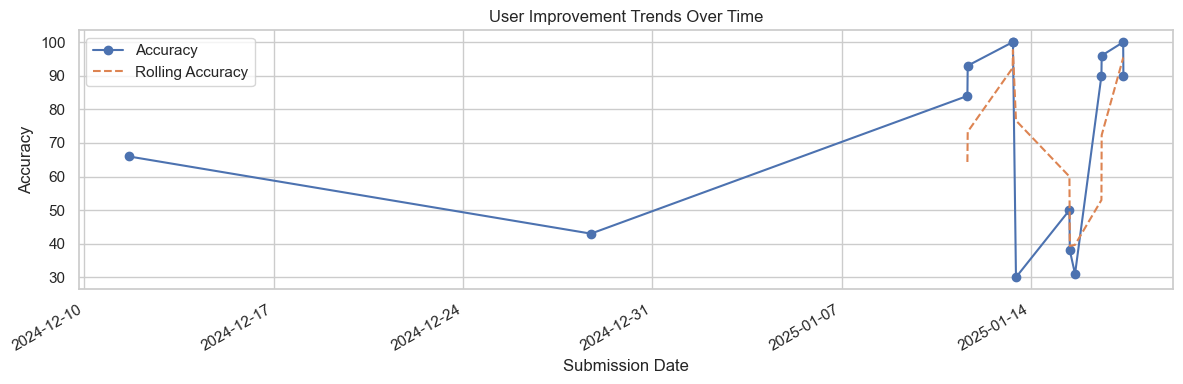

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have the following DataFrame from your structured data:
# - submissions_df: Contains user performance data for each quiz submission.

# Example user_id to analyze
user_id_to_analyze = "YcDFSO4ZukTJnnFMgRNVwZTE4j42"

# Filter submissions for the given user
user_submissions = submissions_df[submissions_df['user_id'] == user_id_to_analyze]

# Convert 'submitted_at' to datetime and sort by date
user_submissions['submitted_at'] = pd.to_datetime(user_submissions['submitted_at'])
user_submissions = user_submissions.sort_values(by='submitted_at')

# Calculate rolling average accuracy to identify trends
user_submissions['rolling_accuracy'] = user_submissions['accuracy'].rolling(window=3).mean()

print("\nUser's Improvement Trends (Rolling Accuracy):")
print(user_submissions[['submitted_at', 'accuracy', 'rolling_accuracy']].tail())

# Plot the trends for visualization
plt.figure(figsize=(12, 4))
plt.plot(user_submissions['submitted_at'], user_submissions['accuracy'], label='Accuracy', marker='o')
plt.plot(user_submissions['submitted_at'], user_submissions['rolling_accuracy'], label='Rolling Accuracy', linestyle='--')

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Show one tick per week
plt.gcf().autofmt_xdate()

plt.xlabel('Submission Date')
plt.ylabel('Accuracy')
plt.title('User Improvement Trends Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
import pandas as pd

# Assuming you have the following DataFrame from your structured data:
# - submissions_df: Contains user performance data for each quiz submission.

# Example user_id to analyze
user_id_to_analyze = "YcDFSO4ZukTJnnFMgRNVwZTE4j42"

# Filter submissions for the given user
user_submissions = submissions_df[submissions_df['user_id'] == user_id_to_analyze]

# Calculate overall average accuracy and score
overall_average_accuracy = submissions_df['accuracy'].mean()
overall_average_score = submissions_df['score'].mean()

# Compare user's performance to overall averages
user_performance_gaps = user_submissions[
    (user_submissions['accuracy'] < overall_average_accuracy) |
    (user_submissions['score'] < overall_average_score)
]

# Display the performance gaps
print("\nUser's Performance Gaps:")
print(user_performance_gaps[['submitted_at', 'accuracy', 'score', 'quiz_id']])


User's Performance Gaps:
                       submitted_at  accuracy  score  quiz_id
13 2024-12-11 20:36:44.822000+05:30      66.0     24       50
12 2024-12-28 22:58:52.969000+05:30      43.0     52       58
9  2025-01-13 13:12:40.687000+05:30     100.0     40       18
7  2025-01-13 16:10:03.743000+05:30      30.0     12       20
6  2025-01-15 15:36:46.410000+05:30      50.0     36        6
5  2025-01-15 15:57:12.791000+05:30      38.0     40       57
4  2025-01-15 20:34:39.462000+05:30      31.0     36       51
3  2025-01-16 20:00:11.562000+05:30      90.0     36        6


In [38]:
import pandas as pd

# Assuming you have the following DataFrame from your structured data:
# - submissions_df: Contains user performance data for each quiz submission.
# - quiz_details_df: Contains details about each quiz, including topics.

# Example user_id to analyze
user_id_to_analyze = "YcDFSO4ZukTJnnFMgRNVwZTE4j42"

# Filter submissions for the given user
user_submissions = submissions_df[submissions_df['user_id'] == user_id_to_analyze]

# Merge with quiz details to get topics
user_merged_df = user_submissions.merge(quiz_details_df, on='quiz_id', how='left')

# Calculate average accuracy by topic for the user
user_topic_performance = user_merged_df.groupby('topic').agg({
    'accuracy': 'mean',
    'score': 'mean',
    'correct_answers': 'sum',
    'incorrect_answers': 'sum'
}).reset_index()

# Identify weak areas for the user (topics with lowest average accuracy)
user_weak_areas = user_topic_performance.sort_values(by='accuracy').head()

# Calculate overall average accuracy and score
overall_average_accuracy = submissions_df['accuracy'].mean()
overall_average_score = submissions_df['score'].mean()

# Compare user's performance to overall averages
user_performance_gaps = user_submissions[
    (user_submissions['accuracy'] < overall_average_accuracy) |
    (user_submissions['score'] < overall_average_score)
]

# Generate recommendations based on weak areas
def generate_recommendations(user_weak_areas, user_performance_gaps):
    recommendations = []

    # Focus on weak topics
    for index, row in user_weak_areas.iterrows():
        topic = row['topic']
        recommendations.append(f"Focus on improving your understanding of '{topic}'. Consider reviewing study materials and practicing related questions.")

    # Address performance gaps
    for index, row in user_performance_gaps.iterrows():
        quiz_id = row['quiz_id']
        recommendations.append(f"Review your performance in quiz ID {quiz_id}. Analyze mistakes and revisit the concepts.")

    # General improvement strategies
    recommendations.append("Set specific goals for each quiz to track your progress.")
    recommendations.append("Engage in regular practice to maintain and enhance your performance trends.")
    recommendations.append("Seek feedback from peers or instructors to gain different perspectives.")

    return recommendations

# Example usage
recommendations = generate_recommendations(user_weak_areas, user_performance_gaps)

# Display recommendations
print("\nRecommendations for Improvement:")
for rec in recommendations:
    print(f"- {rec}")


Recommendations for Improvement:
- Focus on improving your understanding of 'principles of inheritance and variation '. Consider reviewing study materials and practicing related questions.
- Focus on improving your understanding of 'Human Reproduction'. Consider reviewing study materials and practicing related questions.
- Focus on improving your understanding of 'Reproductive Health'. Consider reviewing study materials and practicing related questions.
- Focus on improving your understanding of 'Respiration and Gas Exchange'. Consider reviewing study materials and practicing related questions.
- Focus on improving your understanding of 'Body Fluids and Circulation'. Consider reviewing study materials and practicing related questions.
- Review your performance in quiz ID 50. Analyze mistakes and revisit the concepts.
- Review your performance in quiz ID 58. Analyze mistakes and revisit the concepts.
- Review your performance in quiz ID 18. Analyze mistakes and revisit the concepts.
- 

In [49]:
import pandas as pd

# Assuming you have the following DataFrames:
# - user_weak_areas: Contains topics where the user's accuracy is low.
# - user_topic_performance: Contains average accuracy by topic for the user.

# Example user_id to analyze
user_id_to_analyze = "YcDFSO4ZukTJnnFMgRNVwZTE4j42"

# Define student persona based on performance patterns
def define_student_persona(user_topic_performance):
    strengths = user_topic_performance[user_topic_performance['accuracy'] > 80]
    weaknesses = user_topic_performance[user_topic_performance['accuracy'] < 50]

    persona = {
        "strengths": strengths['topic'].tolist(),
        "weaknesses": weaknesses['topic'].tolist(),
        "learning_style": "Consistent Improver" if not weaknesses.empty else "Needs Focused Practice"
    }

    return persona

# Example usage
student_persona = define_student_persona(user_topic_performance)

# Display student persona
print("\nStudent Persona:")
print(f"Strengths: {', '.join(student_persona['strengths'])}")
print(f"Weaknesses: {', '.join(student_persona['weaknesses'])}")
print(f"Learning Style: {student_persona['learning_style']}")




Student Persona:
Strengths: human health and disease , microbes in human welfare, reproductive health 
Weaknesses: Human Reproduction, Reproductive Health, principles of inheritance and variation 
Learning Style: Consistent Improver


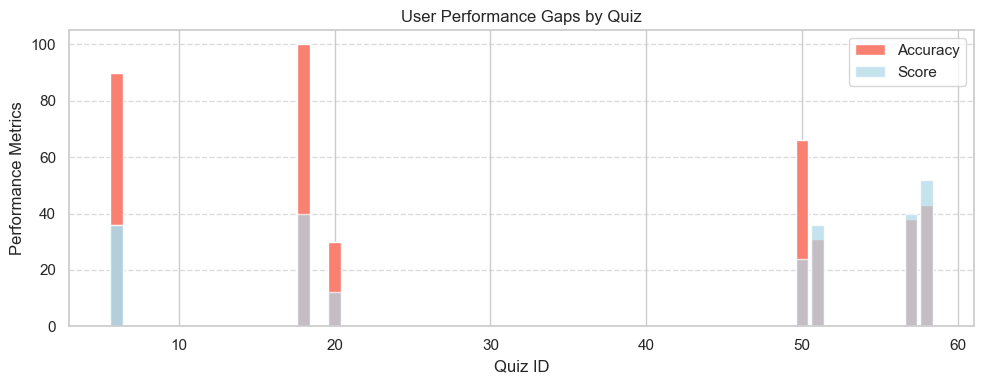

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the following DataFrame:
# - user_performance_gaps: Contains submissions where the user's performance was below average.

# Example DataFrame: user_performance_gaps
# Assuming 'user_performance_gaps' contains 'quiz_id', 'accuracy', and 'score'

# Create a bar chart for performance gaps
plt.figure(figsize=(10, 4))
plt.bar(user_performance_gaps['quiz_id'], user_performance_gaps['accuracy'], color='salmon', label='Accuracy')
plt.bar(user_performance_gaps['quiz_id'], user_performance_gaps['score'], color='lightblue', label='Score', alpha=0.7)

plt.xlabel('Quiz ID')
plt.ylabel('Performance Metrics')
plt.title('User Performance Gaps by Quiz')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot as an image file
plt.savefig('user_performance_gaps.png')

# Show the plot
plt.show()